# Plot the ERFs

In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as py

/home/ords/crd/ccrn/scrd102/ccc_conda/4.6.14/miniconda2/envs/py3_analysis_v1/lib/python3.6/site-packages/dask/config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}


Load the data

In [2]:
root_dir="/home/ords/crd/ccrn/jcl001/PROJECTS/Writing/Sigmond_ODS/ERF/data/"

file=root_dir+"sc_p2-pic-hall01a_185001_201412_rtd074.nc"
ds_hall01=xr.open_dataset(file)
file=root_dir+"sc_p2-pic-hall02_185001_201412_rtd074.nc"
ds_hall02=xr.open_dataset(file)
file=root_dir+"sc_p2-pic-hall03_185001_201412_rtd074.nc"
ds_hall03=xr.open_dataset(file)

file=root_dir+"sc_jcl-tods-fco2-01_195501_201412_rtd074.nc"
ds_hco201=xr.open_dataset(file)
file=root_dir+"sc_jcl-tods-fco2-02_195501_201412_rtd074.nc"
ds_hco202=xr.open_dataset(file)
file=root_dir+"sc_jcl-tods-fco2-03_195501_201412_rtd074.nc"
ds_hco203=xr.open_dataset(file)

file=root_dir+"sc_jcl-tods-faer-01_195501_201412_rtd074.nc"
ds_haer01=xr.open_dataset(file)
file=root_dir+"sc_jcl-tods-faer-02_195501_201412_rtd074.nc"
ds_haer02=xr.open_dataset(file)
file=root_dir+"sc_jcl-tods-faer-03_195501_201412_rtd074.nc"
ds_haer03=xr.open_dataset(file)

file=root_dir+"sc_jcl-tods-fods-01r_195501_201412_rtd074.nc"
ds_hods01=xr.open_dataset(file)
file=root_dir+"sc_jcl-tods-fods-02_195501_201412_rtd074.nc"
ds_hods02=xr.open_dataset(file)
file=root_dir+"sc_jcl-tods-fods-03_195501_201412_rtd074.nc"
ds_hods03=xr.open_dataset(file)

file=root_dir+"sc_pic-ctrlspin2_1950_2049_rtd074.nc"
ds_ctrl=xr.open_dataset(file)


(-1.5, 1.75)

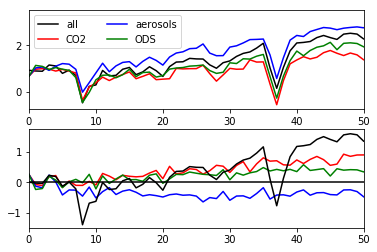

In [13]:
ds_hall=(ds_hall01+ds_hall02+ds_hall03)/3
ds_hco2=(ds_hco201+ds_hco202+ds_hco203)/3
ds_haer=(ds_haer01+ds_haer02+ds_haer03)/3
ds_hods=(ds_hods01+ds_hods02+ds_hods03)/3

# Compute the ERF for all forcings

ds_hall_short=ds_hall.sel(time=slice(106,165))
py.subplot(2,1,1)
py.plot(ds_hall_short.BALT.data,'k-',label="all")
py.plot(ds_hco2.BALT.data,'r-',label='CO2')
py.plot(ds_haer.BALT.data,'b-',label='aerosols')
py.plot(ds_hods.BALT.data,'g-',label='ODS')
py.legend(ncol=2)
py.xlim(0,50)

# Compute the forcing for the experiments
erf_co2=ds_hall_short.BALT.data-ds_hco2.BALT.data
erf_aer=ds_hall_short.BALT.data-ds_haer.BALT.data
erf_ods=ds_hall_short.BALT.data-ds_hods.BALT.data

# Compute the ERF for all forcings
mean_balt_ctrl=np.mean(ds_ctrl.NET_TOA_ENERGY_GLOBAL_BALT__WpM2______________ANN_00001.data)
erf_all=ds_hall_short.BALT.data-mean_balt_ctrl
erf_all=erf_all-erf_all[0]

py.subplot(2,1,2)
py.plot(erf_co2,'r-',
        erf_aer,'b-',
        erf_ods,'g-',
        erf_all,'k-')
py.axhline(color='k')
py.xlim(0,50)
py.ylim(-1.5,1.75)